# Explore here

# This dataset reflects incidents of crime in the City of Los Angeles dating back to 2020

# DATA:
- DR_NO: Division of Records Number: Official file number made up of a 2 digit year, area ID, and 5 digits.
- TIME OCC: MM/DD/YYYY
- Part 1-2: Part I Offenses are serious crimes that occur on a regular basis and are likely to be reported to law enforcement.  Part II Offenses represent “less serious” crime classifications.
- AREA: The LAPD has 21 Community Police Stations referred to as Geographic Areas within the department. These Geographic Areas are sequentially numbered from 1-21.
- Crm Cd: Indicates the crime committed. 
- Vict Age: Two character numeric.
- Vict Sex: F - Female, M - Male, X - Unknown.
- Vict Descent : Descent Code: A - Other Asian B - Black C - Chinese D - Cambodian F - Filipino G - Guamanian H - Hispanic/Latin/Mexican I - American Indian/Alaskan Native J - Japanese K - Korean L - Laotian O - Other P - Pacific Islander S - Samoan U - Hawaiian V - Vietnamese W - White X - Unknown Z - Asian Indian.
- Premis Cd: The type of structure, vehicle, or location where the crime took place.
- Weapon Used Cd: The type of weapon used in the crime.
- Status: Status of the case. (IC is the default)
- Crm Cd 1: Indicates the crime committed. Crime Code 1 is the primary and most serious one. Crime Code 2, 3, and 4 are respectively less serious offenses. Lower crime class numbers are more serious.
- LAT: Latitude.
- LON: Longitude.

In [105]:
# Your code here
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import seaborn as sns
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import tree
from sklearn.tree import plot_tree
from xgboost import XGBClassifier
import pickle
from pickle import dump

In [106]:
crime_ds = pd.read_csv(r'C:\Users\Elisa\Documents\Elisa\Personales\4Geeks Academy\repos\homework\FINAL_PROJECT\data\raw\Crime_Data_from_2020_to_Present.csv')
crime_ds.head(10)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468
5,200100501,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,30,1,Central,163,1,121,"RAPE, FORCIBLE",...,IC,Invest Cont,121.0,998.0,NaN,NaN,700 S BROADWAY,NaN,34.0452,-118.2534
6,200100502,01/02/2020 12:00:00 AM,01/02/2020 12:00:00 AM,1315,1,Central,161,1,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),...,IC,Invest Cont,442.0,998.0,NaN,NaN,700 S FIGUEROA ST,NaN,34.0483,-118.2631
7,200100504,01/04/2020 12:00:00 AM,01/04/2020 12:00:00 AM,40,1,Central,155,2,946,OTHER MISCELLANEOUS CRIME,...,IC,Invest Cont,946.0,998.0,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
8,200100507,01/04/2020 12:00:00 AM,01/04/2020 12:00:00 AM,200,1,Central,101,1,341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI...",...,IC,Invest Cont,341.0,998.0,NaN,NaN,700 BERNARD ST,NaN,34.0677,-118.2398
9,200100509,01/04/2020 12:00:00 AM,01/04/2020 12:00:00 AM,2200,1,Central,192,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,NaN,NaN,NaN,15TH,OLIVE,34.0359,-118.2648


In [107]:
crime_ds.shape

(650684, 28)

In [108]:
crime_ds.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

Change the format of the DATE OCC and Date Rptd to date format

In [109]:
crime_ds['DATE OCC'] = pd.to_datetime(crime_ds['DATE OCC'], errors='coerce')
crime_ds['Date Rptd'] = pd.to_datetime(crime_ds['Date Rptd'], errors='coerce')

crime_ds['DATE OCC'] = pd.to_datetime(crime_ds['DATE OCC'], format="%m/%d/%Y %I:%M:%S %p", errors='coerce').dt.date
crime_ds['Date Rptd'] = pd.to_datetime(crime_ds['Date Rptd'], format="%m/%d/%Y %I:%M:%S %p", errors='coerce').dt.date

C:\Users\Elisa\AppData\Local\Temp\ipykernel_14352\959511950.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  crime_ds['DATE OCC'] = pd.to_datetime(crime_ds['DATE OCC'], errors='coerce')
C:\Users\Elisa\AppData\Local\Temp\ipykernel_14352\959511950.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  crime_ds['Date Rptd'] = pd.to_datetime(crime_ds['Date Rptd'], errors='coerce')


Filtering by date >= to 2020

In [110]:
filtro_fecha_occ = crime_ds['DATE OCC'] >= pd.to_datetime('2020-01-01').date()
filtro_fecha_rptd = crime_ds['Date Rptd'] >= pd.to_datetime('2020-01-01').date()

crime_ds = crime_ds[filtro_fecha_occ & filtro_fecha_rptd]

In [111]:
crime_ds

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,2020-01-08,2020-01-08,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,2020-01-02,2020-01-01,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,2020-04-14,2020-02-13,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,2020-01-01,2020-01-01,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,2020-01-01,2020-01-01,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
650679,231606525,2023-03-22,2023-03-22,1000,16,Foothill,1602,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,12800 FILMORE ST,NaN,34.2790,-118.4116
650680,231210064,2023-04-12,2023-04-12,1630,12,77th Street,1239,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,NaN,NaN,NaN,6100 S VERMONT AV,NaN,33.9841,-118.2915
650681,230115220,2023-07-02,2023-07-01,1,1,Central,154,1,352,PICKPOCKET,...,IC,Invest Cont,352.0,NaN,NaN,NaN,500 S MAIN ST,NaN,34.0467,-118.2485
650682,230906458,2023-03-05,2023-03-05,900,9,Van Nuys,914,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,NaN,NaN,NaN,14500 HARTLAND ST,NaN,34.1951,-118.4487


In [112]:
crime_ds = crime_ds[crime_ds['Vict Age'] != 0]
crime_ds['Weapon Used Cd']= crime_ds['Weapon Used Cd'].fillna(500.0)
crime_ds['Crm Cd 2'] = crime_ds['Crm Cd 2'].fillna(0)
crime_ds['Crm Cd 3'] = crime_ds['Crm Cd 3'].fillna(0)
crime_ds['Crm Cd 4'] = crime_ds['Crm Cd 4'].fillna(0)
crime_ds['Vict Sex'] = crime_ds['Vict Sex'].fillna('X')
crime_ds['Vict Descent'] = crime_ds['Vict Descent'].fillna('X')
crime_ds

C:\Users\Elisa\AppData\Local\Temp\ipykernel_14352\1888650010.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_ds['Weapon Used Cd']= crime_ds['Weapon Used Cd'].fillna(500.0)
C:\Users\Elisa\AppData\Local\Temp\ipykernel_14352\1888650010.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_ds['Crm Cd 2'] = crime_ds['Crm Cd 2'].fillna(0)
C:\Users\Elisa\AppData\Local\Temp\ipykernel_14352\1888650010.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,2020-01-08,2020-01-08,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,0.0,0.0,0.0,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,2020-01-02,2020-01-01,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,0.0,0.0,0.0,700 S HILL ST,NaN,34.0459,-118.2545
3,191501505,2020-01-01,2020-01-01,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,0.0,0.0,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,2020-01-01,2020-01-01,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,0.0,0.0,0.0,14400 TITUS ST,NaN,34.2198,-118.4468
5,200100501,2020-01-02,2020-01-01,30,1,Central,163,1,121,"RAPE, FORCIBLE",...,IC,Invest Cont,121.0,998.0,0.0,0.0,700 S BROADWAY,NaN,34.0452,-118.2534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
650679,231606525,2023-03-22,2023-03-22,1000,16,Foothill,1602,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,0.0,0.0,0.0,12800 FILMORE ST,NaN,34.2790,-118.4116
650680,231210064,2023-04-12,2023-04-12,1630,12,77th Street,1239,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,Invest Cont,230.0,0.0,0.0,0.0,6100 S VERMONT AV,NaN,33.9841,-118.2915
650681,230115220,2023-07-02,2023-07-01,1,1,Central,154,1,352,PICKPOCKET,...,IC,Invest Cont,352.0,0.0,0.0,0.0,500 S MAIN ST,NaN,34.0467,-118.2485
650682,230906458,2023-03-05,2023-03-05,900,9,Van Nuys,914,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,0.0,0.0,0.0,14500 HARTLAND ST,NaN,34.1951,-118.4487


Create dictionaries for describe the codes we will be using

In [113]:
Area_Names = crime_ds.set_index('AREA')['AREA NAME'].to_dict()
Crimes_Defined = crime_ds.set_index('Crm Cd')['Crm Cd Desc'].to_dict()
Location_Described = crime_ds.set_index('Premis Cd')['Premis Desc'].to_dict()
Weapon_Described = crime_ds.set_index('Weapon Used Cd')['Weapon Desc'].to_dict()
Status_Described = crime_ds.set_index('Status')['Status Desc'].to_dict()
Weapon_Described.update({500.0 : 'UNKNOWN WEAPON/OTHER WEAPON'})
Weapon_Described

{400.0: 'STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)',
 500.0: 'UNKNOWN WEAPON/OTHER WEAPON',
 306.0: 'ROCK/THROWN OBJECT',
 511.0: 'VERBAL THREAT',
 204.0: 'FOLDING KNIFE',
 302.0: 'BLUNT INSTRUMENT',
 212.0: 'BOTTLE',
 109.0: 'SEMI-AUTOMATIC PISTOL',
 218.0: 'OTHER CUTTING INSTRUMENT',
 102.0: 'HAND GUN',
 515.0: 'PHYSICAL PRESENCE',
 307.0: 'VEHICLE',
 216.0: 'SCISSORS',
 308.0: 'STICK',
 215.0: 'MACHETE',
 207.0: 'OTHER KNIFE',
 200.0: 'KNIFE WITH BLADE 6INCHES OR LESS',
 506.0: 'FIRE',
 214.0: 'ICE PICK',
 221.0: 'GLASS',
 113.0: 'SIMULATED GUN',
 201.0: 'KNIFE WITH BLADE OVER 6 INCHES IN LENGTH',
 501.0: 'BOMB THREAT',
 312.0: 'PIPE/METAL PIPE',
 512.0: 'MACE/PEPPER SPRAY',
 311.0: 'HAMMER',
 301.0: 'BELT FLAILING INSTRUMENT/CHAIN',
 223.0: 'UNKNOWN TYPE CUTTING INSTRUMENT',
 219.0: 'SCREWDRIVER',
 205.0: 'KITCHEN KNIFE',
 114.0: 'AIR PISTOL/REVOLVER/RIFLE/BB GUN',
 303.0: 'BRASS KNUCKLES',
 106.0: 'UNKNOWN FIREARM',
 206.0: 'SWITCH BLADE',
 101.0: 'REVOLVER',
 304.0: 'CLUB/BA

In [114]:
Status_Described

{'AO': 'Adult Other',
 'IC': 'Invest Cont',
 'AA': 'Adult Arrest',
 'JA': 'Juv Arrest',
 'JO': 'Juv Other',
 'CC': 'UNK'}

Drop the columns that won't be need

In [115]:
drop_columns_ = ['AREA NAME','Crm Cd','Crm Cd Desc', 'Mocodes', 'Premis Desc', 'Weapon Desc', 'Status Desc', 'Cross Street', 'LOCATION']
crime_ds = crime_ds.drop(columns=drop_columns_)
crime_ds

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,Rpt Dist No,Part 1-2,Vict Age,Vict Sex,Vict Descent,Premis Cd,Weapon Used Cd,Status,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
0,10304468,2020-01-08,2020-01-08,2230,3,377,2,36,F,B,501.0,400.0,AO,624.0,0.0,0.0,0.0,34.0141,-118.2978
1,190101086,2020-01-02,2020-01-01,330,1,163,2,25,M,H,102.0,500.0,IC,624.0,0.0,0.0,0.0,34.0459,-118.2545
3,191501505,2020-01-01,2020-01-01,1730,15,1543,2,76,F,W,502.0,500.0,IC,745.0,998.0,0.0,0.0,34.1685,-118.4019
4,191921269,2020-01-01,2020-01-01,415,19,1998,2,31,X,X,409.0,500.0,IC,740.0,0.0,0.0,0.0,34.2198,-118.4468
5,200100501,2020-01-02,2020-01-01,30,1,163,1,25,F,H,735.0,500.0,IC,121.0,998.0,0.0,0.0,34.0452,-118.2534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
650679,231606525,2023-03-22,2023-03-22,1000,16,1602,1,25,F,H,102.0,400.0,IC,230.0,0.0,0.0,0.0,34.2790,-118.4116
650680,231210064,2023-04-12,2023-04-12,1630,12,1239,1,29,M,B,222.0,500.0,IC,230.0,0.0,0.0,0.0,33.9841,-118.2915
650681,230115220,2023-07-02,2023-07-01,1,1,154,1,24,F,H,735.0,500.0,IC,352.0,0.0,0.0,0.0,34.0467,-118.2485
650682,230906458,2023-03-05,2023-03-05,900,9,914,2,53,F,H,502.0,500.0,IC,745.0,0.0,0.0,0.0,34.1951,-118.4487


In [116]:
crime_ds.shape

(375431, 19)

In [117]:
crime_ds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 375431 entries, 0 to 650683
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           375431 non-null  int64  
 1   Date Rptd       375431 non-null  object 
 2   DATE OCC        375431 non-null  object 
 3   TIME OCC        375431 non-null  int64  
 4   AREA            375431 non-null  int64  
 5   Rpt Dist No     375431 non-null  int64  
 6   Part 1-2        375431 non-null  int64  
 7   Vict Age        375431 non-null  int64  
 8   Vict Sex        375431 non-null  object 
 9   Vict Descent    375431 non-null  object 
 10  Premis Cd       375430 non-null  float64
 11  Weapon Used Cd  375431 non-null  float64
 12  Status          375431 non-null  object 
 13  Crm Cd 1        375425 non-null  float64
 14  Crm Cd 2        375431 non-null  float64
 15  Crm Cd 3        375431 non-null  float64
 16  Crm Cd 4        375431 non-null  float64
 17  LAT            

In [118]:
crime_ds.isnull().sum()

DR_NO             0
Date Rptd         0
DATE OCC          0
TIME OCC          0
AREA              0
Rpt Dist No       0
Part 1-2          0
Vict Age          0
Vict Sex          0
Vict Descent      0
Premis Cd         1
Weapon Used Cd    0
Status            0
Crm Cd 1          6
Crm Cd 2          0
Crm Cd 3          0
Crm Cd 4          0
LAT               0
LON               0
dtype: int64

In [119]:
crime_ds = crime_ds.dropna(subset=crime_ds.columns)
crime_ds.isna().sum()

DR_NO             0
Date Rptd         0
DATE OCC          0
TIME OCC          0
AREA              0
Rpt Dist No       0
Part 1-2          0
Vict Age          0
Vict Sex          0
Vict Descent      0
Premis Cd         0
Weapon Used Cd    0
Status            0
Crm Cd 1          0
Crm Cd 2          0
Crm Cd 3          0
Crm Cd 4          0
LAT               0
LON               0
dtype: int64

We have some typing errors so we are going to replace them.

In [120]:
crime_ds['Vict Sex'].replace('H', 'M', inplace= True)
crime_ds['Vict Descent'].replace('-', 'X', inplace= True)

C:\Users\Elisa\AppData\Local\Temp\ipykernel_14352\1685594789.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_ds['Vict Sex'].replace('H', 'M', inplace= True)
C:\Users\Elisa\AppData\Local\Temp\ipykernel_14352\1685594789.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_ds['Vict Descent'].replace('-', 'X', inplace= True)


Factorize the categorical variables

In [121]:
crime_ds['sex_n'] = pd.factorize(crime_ds['Vict Sex'])[0]
crime_ds['descent_n'] = pd.factorize(crime_ds['Vict Descent'])[0]
crime_ds['status_n'] = pd.factorize(crime_ds['Status'])[0]

C:\Users\Elisa\AppData\Local\Temp\ipykernel_14352\622655988.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_ds['sex_n'] = pd.factorize(crime_ds['Vict Sex'])[0]
C:\Users\Elisa\AppData\Local\Temp\ipykernel_14352\622655988.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_ds['descent_n'] = pd.factorize(crime_ds['Vict Descent'])[0]
C:\Users\Elisa\AppData\Local\Temp\ipykernel_14352\622655988.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

Create dicts for the factorize values

In [122]:
sex_described = crime_ds.set_index('sex_n')['Vict Sex'].to_dict()
vic_descent_described = crime_ds.set_index('descent_n')['Vict Descent'].to_dict()
status_n_described = crime_ds.set_index('status_n')['Status'].to_dict()
sex_described

{0: 'F', 1: 'M', 2: 'X'}

In [123]:
frec_sex = crime_ds['Vict Sex'].value_counts()
frec_sex

Vict Sex
M    188969
F    179522
X      6933
Name: count, dtype: int64

In [124]:
crime_ds['Vict Descent'].value_counts()

Vict Descent
H    148526
W     93474
B     71014
O     32514
A     11039
X      9087
C      2481
K      2418
F      2189
J       810
V       641
I       575
Z       291
P       146
U        73
D        49
G        38
L        37
S        22
Name: count, dtype: int64

In [125]:
crime_ds['Status'].value_counts()

Status
IC    296908
AO     45032
AA     31626
JA      1244
JO       610
CC         4
Name: count, dtype: int64

In [126]:
crime_ds.shape
print(f'Crime dataset shape after clenaing: {crime_ds.shape}')

Crime dataset shape after clenaing: (375424, 22)


In [52]:
SexDescription = {
    "F": "Female",
    "M": 'Male',
    "X": 'Unknown'
}
DescentDescription = {
    'B': 'Black',
    'H': 'Hispanic/Latin/Mexican',
    'W': 'White',
    'X': 'Unknown',
    'A': 'Other Asian',
    'O': 'Other',
    'C': 'Chinese',
    'F': 'Filipino',
    'K': 'Korean',
    'I': 'American Indian/Alaskan Native',
    'V': 'Vietnamese',
    'J': 'Japanese',
    'D': 'Cambodian',
    'Z': 'Asian Indian',
    'U': 'Hawaiian',
    'P': 'Pacific Islander',
    'G': 'Guamanian',
    'S': 'Samoan',
    'L': 'Laotian'
}
StatusDescription = {
    'AO': 'Adult Other',
    'IC': 'Invest Cont',
    'AA': 'Adult Arrest',
    'JA': 'Juv Arrest',
    'JO': 'Juv Other',
    'CC': 'UNK'
}

AreaDescription = {
    1 : 'Central Police Station, 251 East 6th Street 90014',
    2 : 'Rampart Police Station, 1401 West 6th Street 90017',
    3 : 'Southwest Police Station, 1546 West Martin Luther King Jr. Boulevard 90062',
    4 : 'Hollenbeck Police Station, 2111 East 1st St 90033',
    5 : 'San Pedro Police Station, 2175 John S Gibson Boulevard 90731',
    6 : 'Hollywood Police Station, 1358 North Wilcox Avenue 90028',
    7 : 'Wilshire Police Station, 4861 West Venice Boulevard 90019',
    8 : 'West Los Angeles Police Station, 1663 South Butler Avenue 90025',
    9 : 'Van Nuys Police Station, 6240 Sylmar Avenue 91401',
    10 : 'West Valley Substation, 19020 Vanowen Street 91335',
    11 : 'Northeast Police Station, 3353 North San Fernando Road 90065',
    12 : '77th Street Police Station,7600 South Broadway 90003',
    13 : 'Newton Street Police Station, 3400 South Central Ave 90011',
    14 : 'Pacific Police Station, 12312 West Culver Boulevard 90066',
    15 : 'North Hollywood Police Station, 11640 Burbank Boulevard 91601',
    16 : 'Foothill Police Station, 12760 Osborne Street 91331',
    17 : 'Devonshire Police Station, 10250 Etiwanda Avenue 91324',
    18 : 'Southeast Police Station, 145 West 108th Street 90061',
    19 : 'Mission Police Station, 11121 North Sepulveda Boulevard 91345',
    20 : 'Olympic Police Station, 1130 South Vermont Avenue 90006',
    21 : 'Topanga Police Station, 21501 Schoenborn Street 91304'
}

All the data is clean now.

Let's plot the data to see correlations.

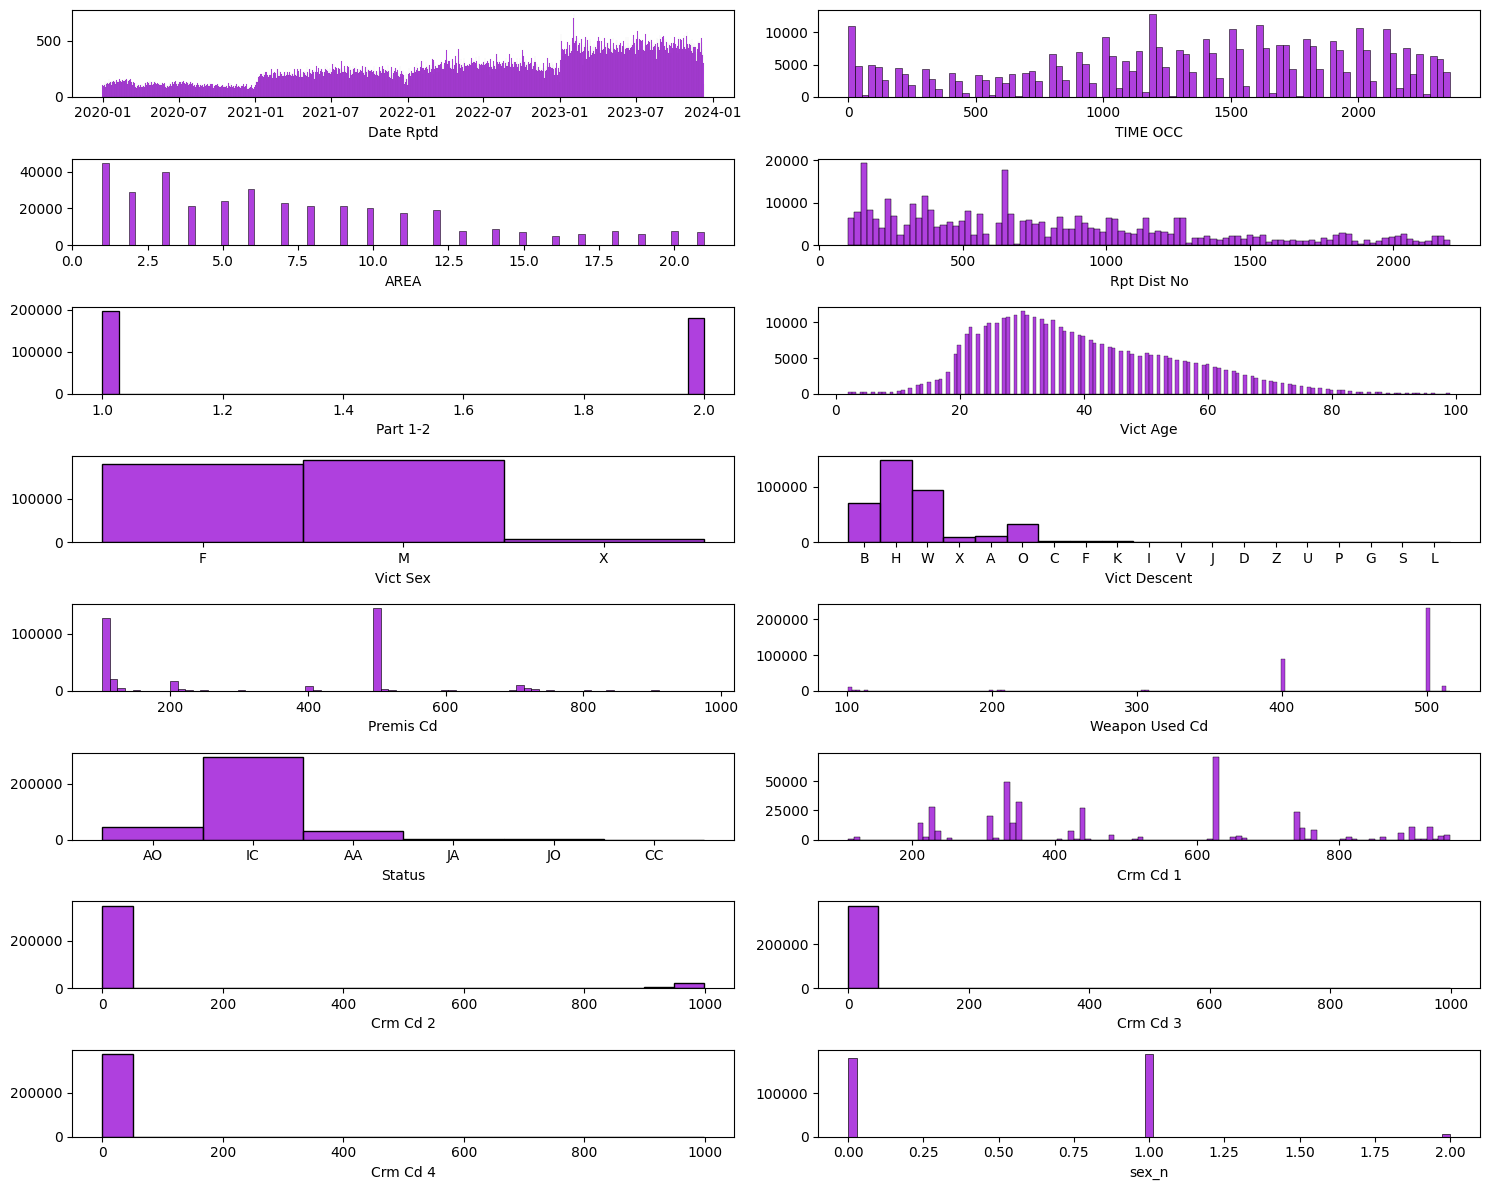

In [28]:
fig, axis = plt.subplots(8, 2, figsize = (15, 12))
df2 = crime_ds.drop(['DR_NO', 'DATE OCC', 'LAT', 'LON'], axis=1)
cols = df2.columns
for col, ax in zip(cols, axis.ravel()):
    sns.histplot(ax = ax, data = df2, x = col, color = 'darkviolet').set(ylabel = None)
plt.tight_layout()
plt.show()

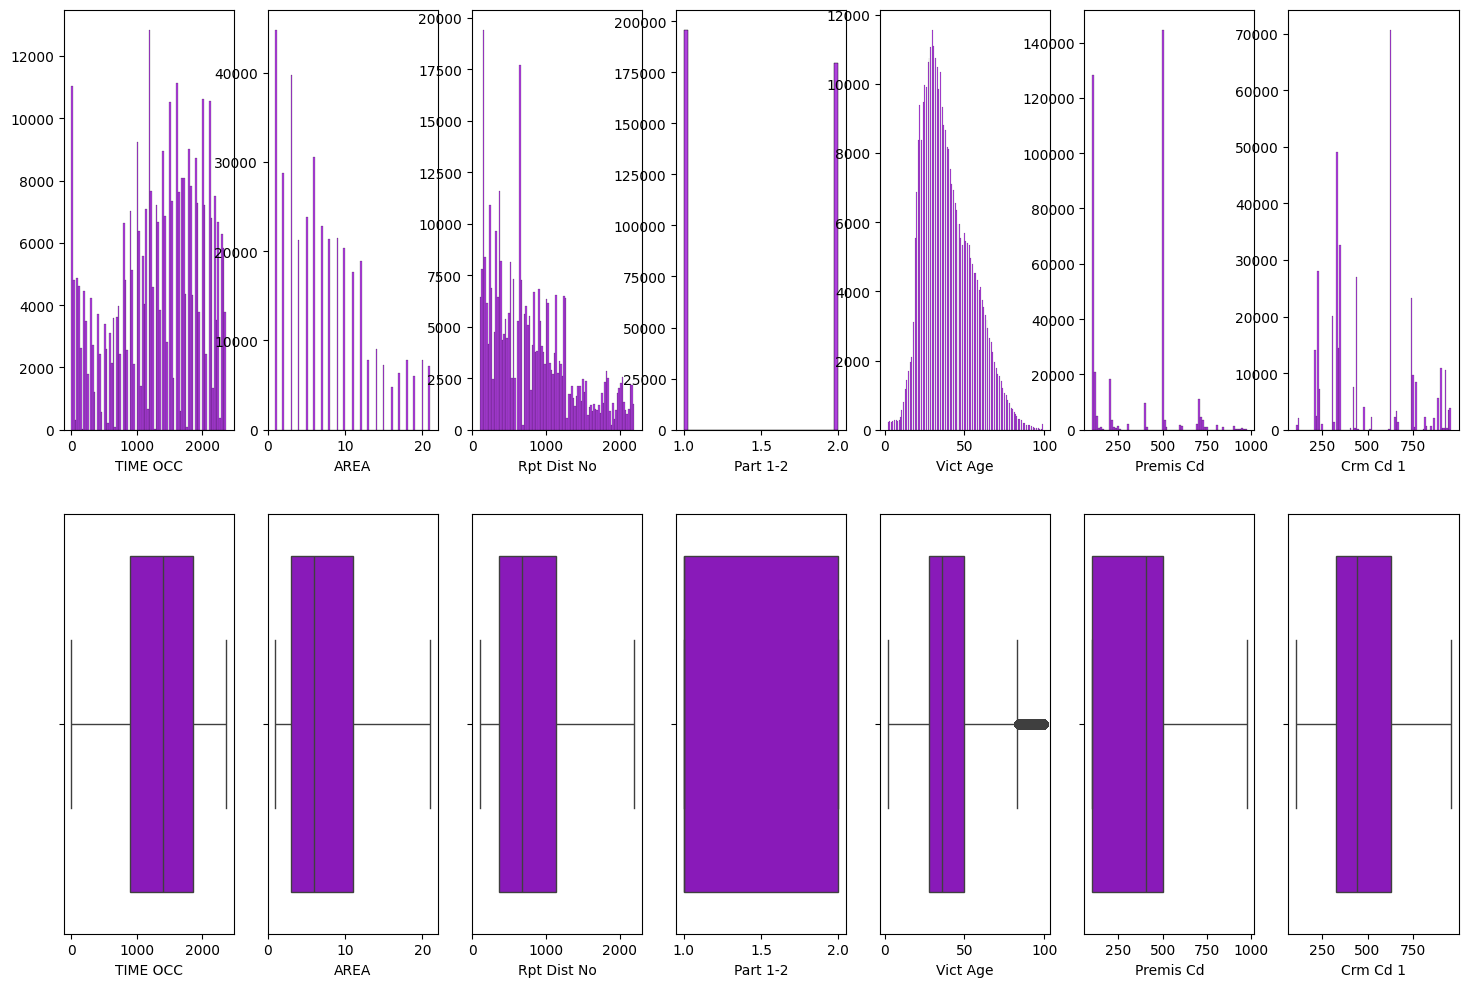

In [29]:
fig, axis = plt.subplots(2, 7, figsize = (18, 12))
df2 = crime_ds.drop(['DR_NO', 'Date Rptd', 'DATE OCC', 'LAT', 'LON', 'Vict Sex', 'Vict Descent', 'Weapon Used Cd', 'Status', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'sex_n', 'status_n', 'descent_n'], axis=1)
cols = df2.columns
for i, col in enumerate(cols):
    sns.histplot(ax=axis[0, i], data=crime_ds, x=col, color='darkviolet').set(ylabel=None)
    sns.boxplot(ax=axis[1, i], data=crime_ds, x=col, color='darkviolet')
plt.show()

In [27]:
crime_ds.shape

(375424, 22)

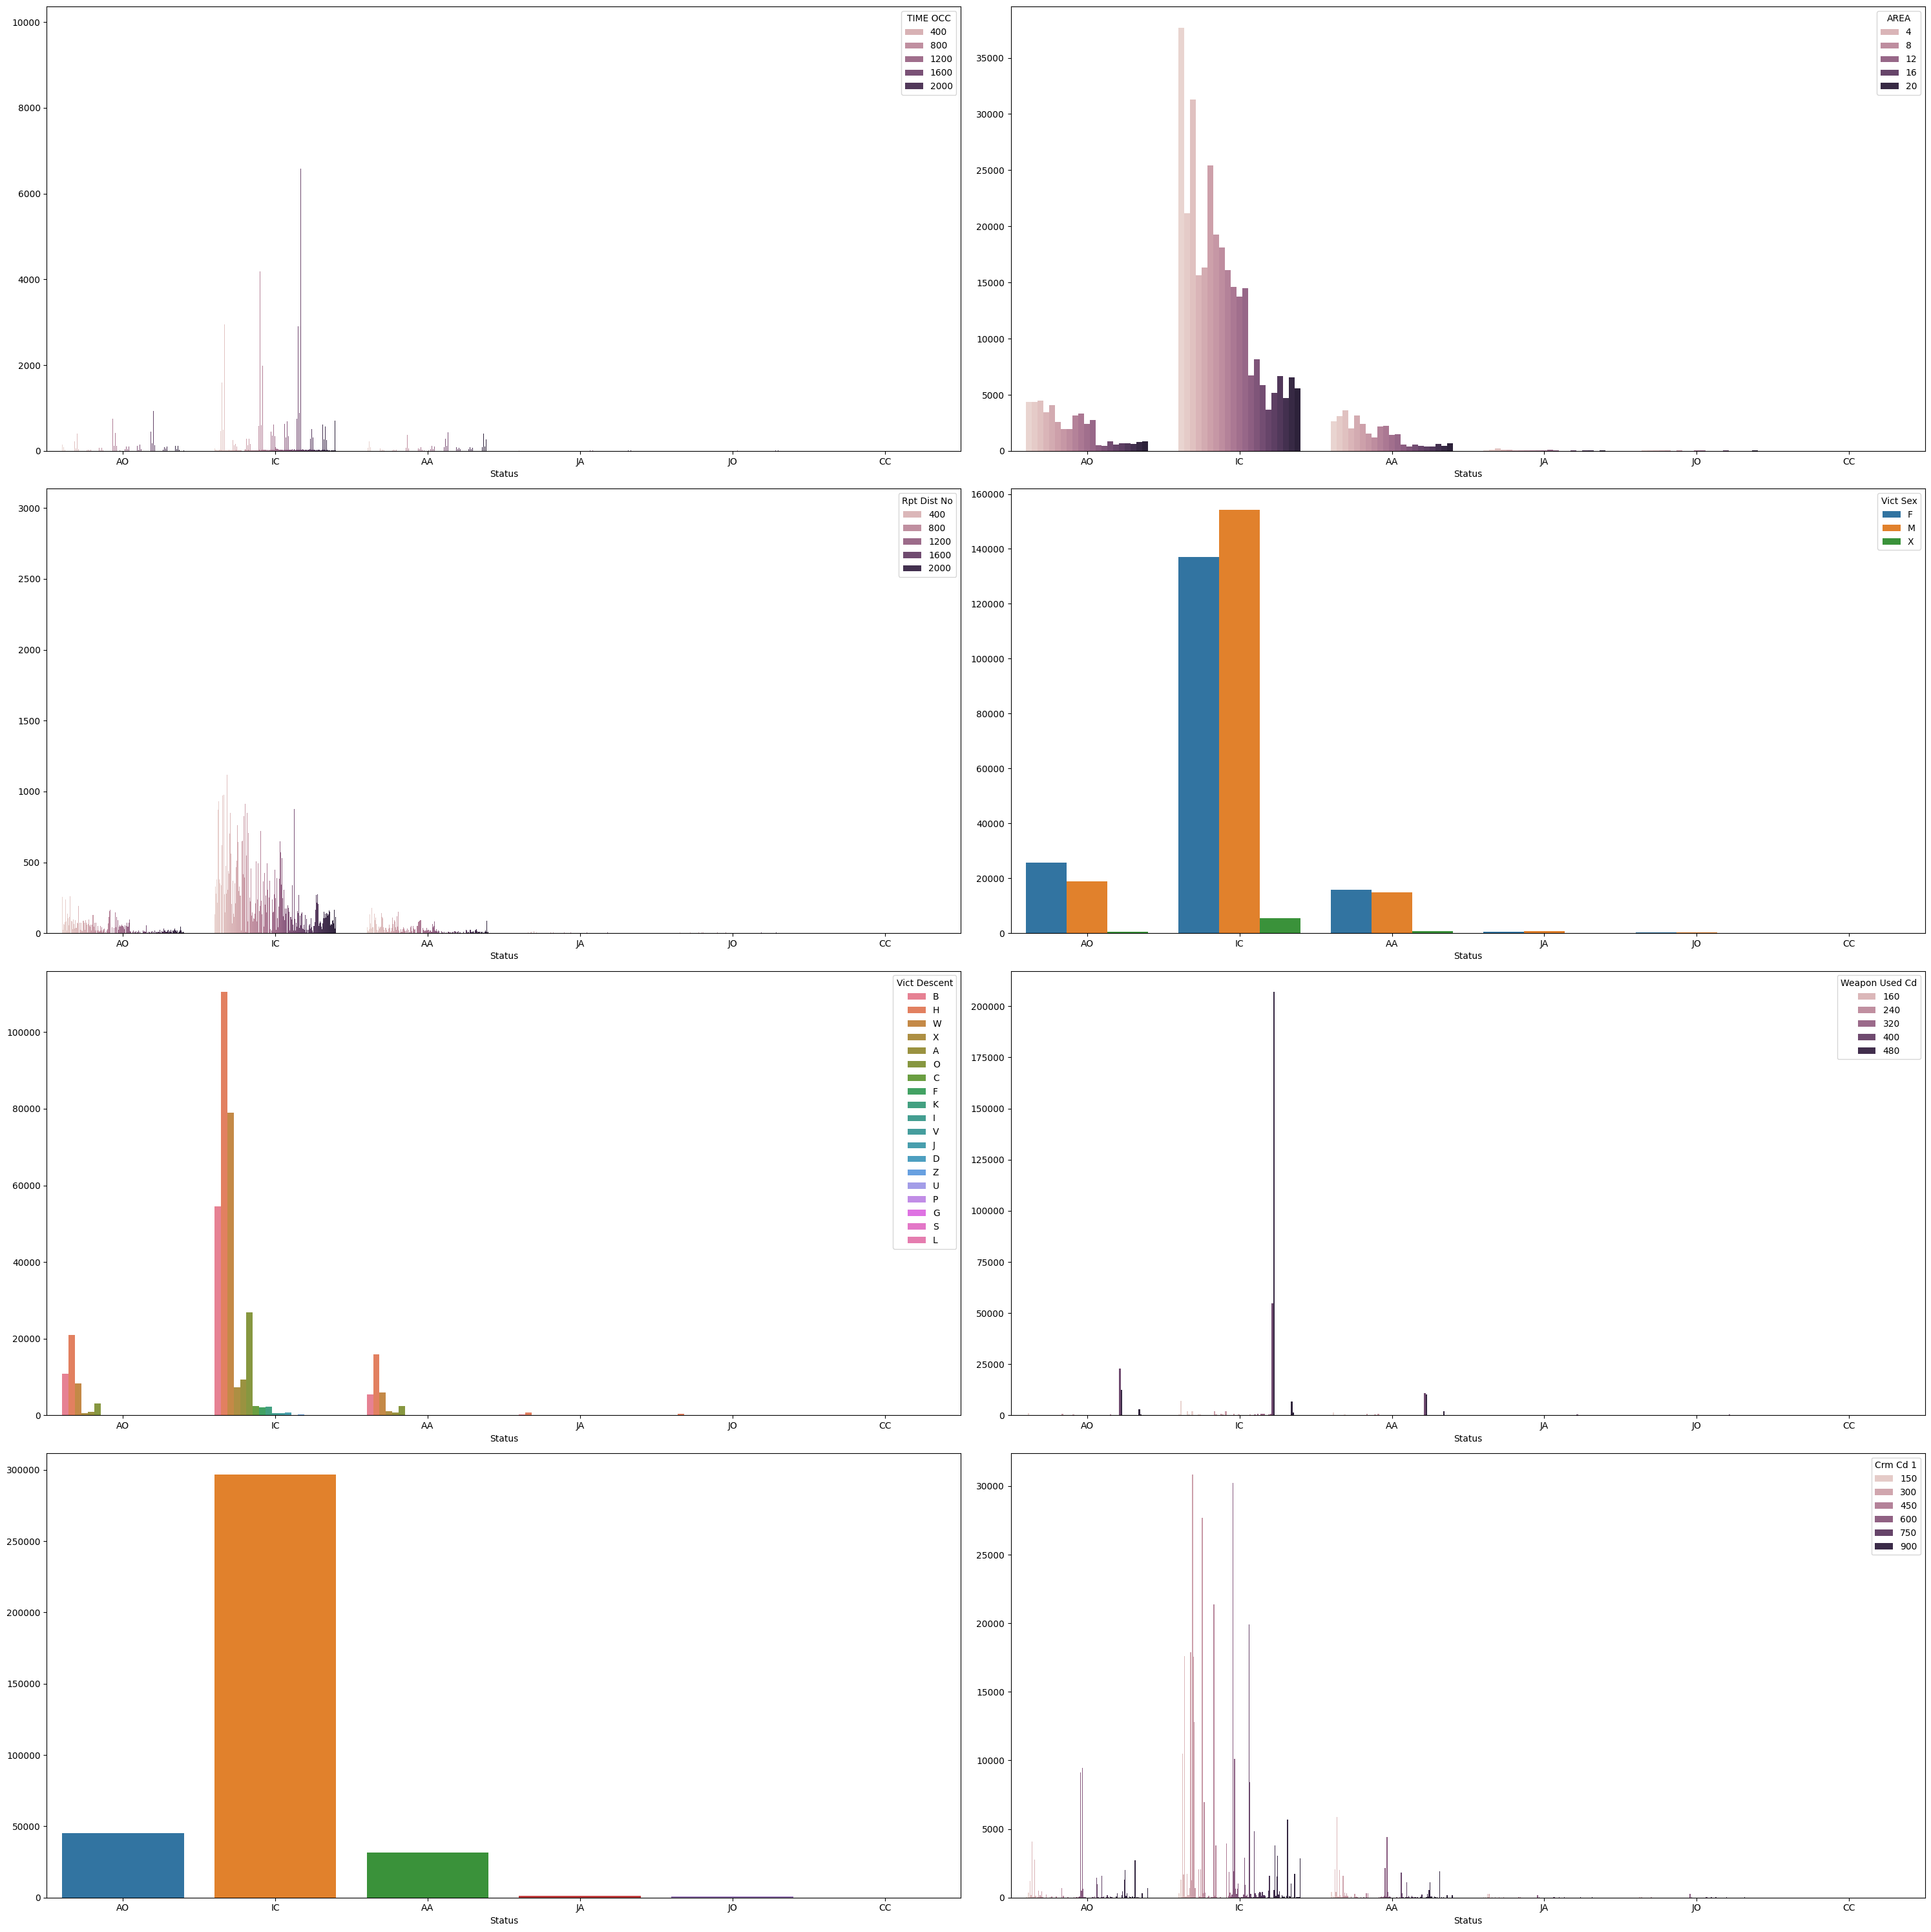

In [29]:
fig, axis = plt.subplots(4, 2, figsize = (30, 30))
cols = ['TIME OCC', 'AREA', 'Rpt Dist No', 'Vict Sex', 'Vict Descent', 'Weapon Used Cd', 'Status', 'Crm Cd 1']
for col, ax in zip(cols, axis.ravel()):
    sns.countplot(ax = ax, data = crime_ds, x = 'Status', hue = col).set_ylabel(None)
plt.tight_layout()

In [32]:
from ipyleaflet import Map, Marker, basemaps, AwesomeIcon
import pandas as pd

# Crea el mapa con un centro y zoom inicial
mymap = Map(basemap=basemaps.Esri.WorldImagery, center=(crime_ds['LAT'].mean(), crime_ds['LON'].mean()), zoom=10)
# Agrega los marcadores al mapa
for index, row in crime_ds.iterrows():
    color = 'blue'
    marker = Marker(location=(row['LAT'], row['LON']), icon=AwesomeIcon(name='house', marker_color=color), draggable=False)
    mymap.add_layer(marker)
# Visualiza el mapa
mymap

KeyboardInterrupt: 

In [21]:
#create data base

conn = sqlite3.connect('CrimeDB.db')

crime_ds.to_sql('mi_tabla', conn, index=False, if_exists='replace')

conn.close()


Split the data into train and test

In [37]:
# split the data into train and test
X = crime_ds.drop(['Date Rptd','DATE OCC','Status', 'Vict Descent', 'Vict Sex', 'status_n'], axis = 1)
y = crime_ds["status_n"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#save the data
X_train.to_csv('..\data\processed\crime_ X_train.csv', index=False)
y_test.to_csv('..\data\processed\crime_y_test.csv', index=False)


In [24]:
X_train.head()

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON,sex_n,descent_n
300351,210716738,2200,7,755,2,38,502.0,400.0,624.0,0.0,0.0,0.0,34.0512,-118.3558,1,2
638445,230411473,400,4,415,1,23,502.0,400.0,236.0,0.0,0.0,0.0,34.0765,-118.2118,0,1
425566,220716633,2030,7,745,1,26,101.0,500.0,420.0,0.0,0.0,0.0,34.0573,-118.3491,1,2
237577,211004582,1800,10,1043,2,46,122.0,500.0,745.0,0.0,0.0,0.0,34.1769,-118.5384,0,0
415883,220611340,800,6,629,1,59,101.0,500.0,330.0,0.0,0.0,0.0,34.1201,-118.3163,0,5


In [153]:
model = RandomForestClassifier(n_estimators = 100, random_state = 28)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [152]:
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.2f}")

print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.81



Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.25      0.33      9086
           1       0.83      0.97      0.90     59293
           2       0.48      0.10      0.17      6305
           3       0.92      0.04      0.08       276
           4       0.57      0.03      0.06       125

    accuracy                           0.81     75085
   macro avg       0.66      0.28      0.31     75085
weighted avg       0.76      0.81      0.76     75085



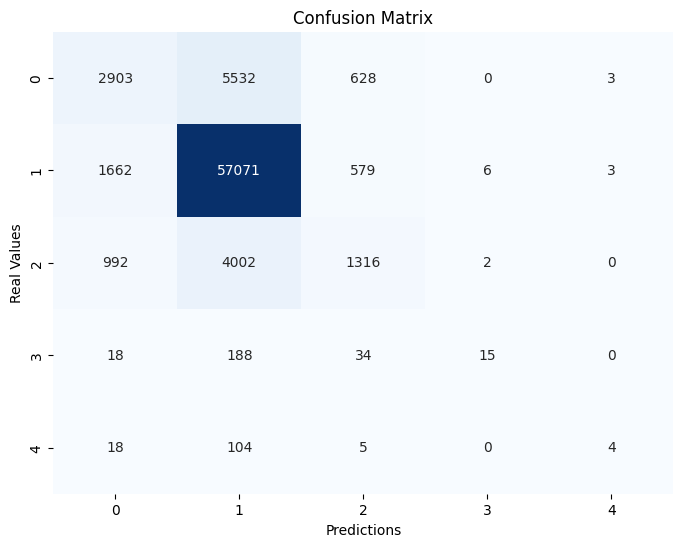

In [145]:
from sklearn.metrics import confusion_matrix
# Crear la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predictions')
plt.ylabel('Real Values')
plt.show()

The confusion matrix shows the ranking of the model predictions compared to the true values. In this case, the largest number (57,071) in the matrix indicates that there are a large number of true positives, which is good. However, there are also classification errors present in other boxes of the matrix ..

The random forest model give us 82% accuracy, let's try some other. 
Save the model as model base.

In [36]:
dump(model, open("../models/RandomForestClassifier_n-estimators_100_28.sav", "wb"))

Hyperparameter optimization:

In [27]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [1, 10, 100],
    'min_samples_leaf': [1, 10, 100],
    'max_features': ['auto', 'sqrt', 'log2']
}


grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best parameters:", best_params)

best_model = grid_search.best_estimator_

predictions = best_model.predict(X_test)

# Evaluación del modelo, por ejemplo, accuracy
accuracy = (predictions == y_test).mean()
print(f"Accuracy: {accuracy}")

c:\Users\Elisa\miniconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\Elisa\miniconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
675 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
405 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Elisa\miniconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Elisa\miniconda3\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._va

Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 150}
Accuracy: 0.8149164280482121


In [127]:
new_data = crime_ds.drop(columns=['LAT','LON','Crm Cd 2','Crm Cd 3','Crm Cd 4'])
new_data

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,Rpt Dist No,Part 1-2,Vict Age,Vict Sex,Vict Descent,Premis Cd,Weapon Used Cd,Status,Crm Cd 1,sex_n,descent_n,status_n
0,10304468,2020-01-08,2020-01-08,2230,3,377,2,36,F,B,501.0,400.0,AO,624.0,0,0,0
1,190101086,2020-01-02,2020-01-01,330,1,163,2,25,M,H,102.0,500.0,IC,624.0,1,1,1
3,191501505,2020-01-01,2020-01-01,1730,15,1543,2,76,F,W,502.0,500.0,IC,745.0,0,2,1
4,191921269,2020-01-01,2020-01-01,415,19,1998,2,31,X,X,409.0,500.0,IC,740.0,2,3,1
5,200100501,2020-01-02,2020-01-01,30,1,163,1,25,F,H,735.0,500.0,IC,121.0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
650679,231606525,2023-03-22,2023-03-22,1000,16,1602,1,25,F,H,102.0,400.0,IC,230.0,0,1,1
650680,231210064,2023-04-12,2023-04-12,1630,12,1239,1,29,M,B,222.0,500.0,IC,230.0,1,0,1
650681,230115220,2023-07-02,2023-07-01,1,1,154,1,24,F,H,735.0,500.0,IC,352.0,0,1,1
650682,230906458,2023-03-05,2023-03-05,900,9,914,2,53,F,H,502.0,500.0,IC,745.0,0,1,1


In [129]:
new_data.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,Rpt Dist No,Part 1-2,Vict Age,Vict Sex,Vict Descent,Premis Cd,Weapon Used Cd,Status,Crm Cd 1,sex_n,descent_n,status_n
0,10304468,2020-01-08,2020-01-08,2230,3,377,2,36,F,B,501.0,400.0,AO,624.0,0,0,0
1,190101086,2020-01-02,2020-01-01,330,1,163,2,25,M,H,102.0,500.0,IC,624.0,1,1,1
3,191501505,2020-01-01,2020-01-01,1730,15,1543,2,76,F,W,502.0,500.0,IC,745.0,0,2,1
4,191921269,2020-01-01,2020-01-01,415,19,1998,2,31,X,X,409.0,500.0,IC,740.0,2,3,1
5,200100501,2020-01-02,2020-01-01,30,1,163,1,25,F,H,735.0,500.0,IC,121.0,0,1,1


Trained models:

In [29]:
xgb_model = XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=28)

xgb_model.fit(X_train, y_train)

predictions_xgb = xgb_model.predict(X_test)

acc_xgb = accuracy_score(y_test, predictions_xgb)
print(f"Accuracy: {acc_xgb:.2f}")

print("\nClassification Report:\n", classification_report(y_test, predictions_xgb))

Accuracy: 0.80


c:\Users\Elisa\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Elisa\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.17      0.25      9066
           1       0.82      0.98      0.89     59321
           2       0.53      0.11      0.18      6312
           3       0.00      0.00      0.00       255
           4       0.00      0.00      0.00       131

    accuracy                           0.80     75085
   macro avg       0.36      0.25      0.26     75085
weighted avg       0.75      0.80      0.75     75085



c:\Users\Elisa\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
from sklearn.svm import SVC

# Crear un modelo SVM
svm_model = SVC(kernel='rbf', C=1.0, random_state=28)

svm_model.fit(X_train, y_train)

predictions_svm = svm_model.predict(X_test)

acc_svm = accuracy_score(y_test, predictions_svm)
print(f"Accuracy: {acc_svm:.2f}")

print("\nClassification Report:\n", classification_report(y_test, predictions_svm))

Accuracy: 0.79

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      9066
           1       0.79      1.00      0.88     59321
           2       0.00      0.00      0.00      6312
           3       0.00      0.00      0.00       255
           4       0.00      0.00      0.00       131

    accuracy                           0.79     75085
   macro avg       0.16      0.20      0.18     75085
weighted avg       0.62      0.79      0.70     75085



c:\Users\Elisa\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Elisa\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Elisa\miniconda3\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
